In [1]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.9 MB/s 


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

In [ ]:
len(a[0])

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if(len(a[0]) == len(b)):
       
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

    else:
      print("Las condiciones de las matrices no son aptas para multiplicarse.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a, b)

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [3, 4, 5, 6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time

matmul(a, b)

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
m=0

for i in range(0,10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)  
 
  s=time.time()  
  x = matmul(randa, randb)
  e=time.time()-s
  m=m+e
m=m/10

In [ ]:
m

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
time_data_frame=pd.DataFrame([m],index=['Python'],columns=['Promedio tiempo'])
time_data_frame

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
mn=0
for i in range(0,10):
  
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600) ) 
  s=time.time()  
  x=randa@randb
  e=time.time()-s
  mn=mn+e
mn=mn/10
time_data_frame=pd.DataFrame([m,mn],index=['Python','NumPy'],columns=['Promedio tiempo'])
time_data_frame

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A=[[7,3],
   [5,7]]
B= [[1,8],
    [3,9]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine  matmul(A,B,N,L,M,R)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(2,2)
  double precision, intent(in) :: B(2,2)
  double precision, intent(out) :: R(N,M)
  integer I,J,K
  do I=1,N  
    do J=1,M
      R(I,J)=0    
      do K=1,L
       R(I,J) = R(I,J) + A(I,K)*B(K,J)
        
      end do
    end do
  end do   
end 

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
N= len(A)
M= len(B[0])
L=len(A[0])
matmul(A,B,N,L,M)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine  matmul(A,B,N,L,M,R)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(600,100)
  double precision, intent(in) :: B(100,600)
  double precision, intent(out) :: R(N,M)
  integer I,J,K
  do I=1,N  
    do J=1,M
      R(I,J)=0    
      do K=1,L
       R(I,J) = R(I,J) + A(I,K)*B(K,J)
        
      end do
    end do
  end do   
end 

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
N= len(randa)
M= len(randb[0])
L=len(randa[0])
matmul(randa,randb,N,L,M)


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
mf=0
for i in range(0,10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)
  N= len(randa)
  M= len(randb[0])
  L=len(randa[0])
  s=time.time()  
  matmul(randa,randb,N,L,M)
  e=time.time()-s
  mf=mf+e
mf=mf/10
time_data_frame=pd.DataFrame([m,mn,mf],index=['Python','NumPy','Fortran Magic'],columns=['Promedio tiempo'])
time_data_frame

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran

subroutine  matmul10(A,B,N,L,M,R)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(600,100)
  double precision, intent(in) :: B(100,600)
  double precision, intent(out) :: R(N,M)
  integer I,J,K,P
  do P=0,10
   do I=1,N  
     do J=1,M
       R(I,J)=0    
        do K=1,L
        R(I,J) = R(I,J) + A(I,K)*B(K,J)
        
        end do
      end do
    end do
  end do   
end 

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
N= len(randa)
M= len(randb[0])
L=len(randa[0])
s=time.time() 
matmul10(randa,randb,N,L,M)
e=time.time()-s
e=e/10



**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
time_data_frame=pd.DataFrame([m,mn,mf,e],index=['Python','NumPy','Fortran Magic','Fortran'],columns=['Promedio tiempo'])
time_data_frame

**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_matrices.c
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;
 
 for ( i = 0; i < 600; ++i){
   for ( j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }
     
  }
 

int matrixB[100][600];
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
       
     for (int k = 0; k < 100; k++){
         
      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];
      
     }
       
   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC); 
    
    mc=mc+time;
}
mc=mc/10;
cout << mc;


   return 0; 
  }


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ mult_matrices.c && ./a.out

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
time_data_frame=pd.DataFrame([m,mn,mf,e,0.159717],index=['Python','NumPy','Fortran Magic','Fortran','C'],columns=['Promedio tiempo'])
time_data_frame

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_matrices.cpp
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;
 
 for ( i = 0; i < 600; ++i){
   for ( j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }
     
  }
 

int matrixB[100][600];
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
       
     for (int k = 0; k < 100; k++){
         
      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];
      
     }
       
   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC); 
    
    mc=mc+time;
}
mc=mc/10;
cout << mc;


   return 0; 
  }

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!g++ mult_matrices.cpp && ./a.out


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
time_data_frame=pd.DataFrame([m,mn,mf,e,0.159717,0.160875],index=['Python','NumPy','Fortran Magic','Fortran','C','C++'],columns=['Promedio tiempo'])
time_data_frame

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.concurrent.*;
class Main{
  public static void main(String[] args){
    long media = 0;
    double respuesta = 0;
    int contador = 0;
    //matrices
    int a [][]= new int[600][100];
    int b [][] =new int[100][600];
    for(int x=0; x<a.length;x++){
      for(int y=0;y<a[x].length;y++){
        a[x][y] = (int) (Math.random()*999+1);
          }
        }
    for(int x=0; x<b.length;x++){
      for(int y=0;y<b[x].length;y++){
        b[x][y] = (int) (Math.random()*999+1);
          }
        } 
    int[][] c = new int[a.length][b[0].length];
    for(contador=0;contador<10;contador++){
      long tiempo1 =System.currentTimeMillis();
      for(int i=0;i<c.length;i++){
          for(int j=0;j<c[0].length;j++){
            for(int k=0;k<b.length;k++){
              c[i][j]+=a[i][k]*b[k][j]; 
            }
          }
        }
      long tiempo2=System.currentTimeMillis();
      long tiempofinal = tiempo2 - tiempo1;
      media += tiempofinal;      
      
    } 
    respuesta= (media/10);
    respuesta= respuesta*(0.001);
    System.out.println(respuesta); 
  }
}

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java

In [ ]:
!java Main

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
time_data_frame=pd.DataFrame([m,mn,mf,e,0.159717,0.160875,0.044],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java'],columns=['Promedio tiempo'])
time_data_frame

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js

var MatrizA = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => (Math.random() * 80));
  MatrizA.push(a)
}
var MatrizB = []
for (var i = 0; i < 100; i++) {
  x=Array.from({length: 600}, () => (Math.random() * 80));
  MatrizB.push(x)
}
tiempito=0
for(i=0; i<10;i++){
    var start = new Date().getTime();
    var matm= new Array(MatrizA.length);
      for (x=0; x<matm.length;x++)
        matm[x] = new Array(MatrizB[0].length).fill(0);
      for (x=0; x < matm.length; x++) {
        for (y=0; y < matm[x].length; y++) {                                
            for (z=0; z<MatrizA[0].length; z++) {
               matm [x][y] = matm [x][y] + MatrizA[x][z]*MatrizB[z][y]; 
        }
    }
}
    var end = new Date().getTime();
    tiempito +=(end-start)
}
console.log(`Average time: ${tiempito/10} ms`) 






**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node tmp.js

**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
time_data_frame=pd.DataFrame([m,mn,mf,e,0.159717,0.160875,0.044,0.15339477],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java','JavaScript'],columns=['Promedio tiempo'])
time_data_frame

**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min=time_data_frame['Promedio tiempo'].min()
min

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
fac=np.round(time_data_frame['Promedio tiempo']/min) 
time_data_frame['Speed factor']=fac

time_data_frame

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
time_data_frame=time_data_frame.sort_values('Promedio tiempo')
time_data_frame

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: ignored

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [3]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 85 (delta 20), reused 17 (delta 10), pack-reused 52
Unpacking objects: 100% (85/85), done.


In [4]:
!git clone <urlOfRepository>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <urlOfRepository>'


In [5]:
!pip install githubdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!githubdl

usage: githubdl [-h] (-f FILE | -d DIR | -a | -b) -u URL [-t TARGET]
                [-g GIT_TOKEN] [-l LOG_LEVEL] [-r REFERENCE] [-s]
githubdl: error: the following arguments are required: -u/--url


In [64]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )
    

In [8]:

avocados = read_avocadata('2014', '2016')
avocados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [9]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

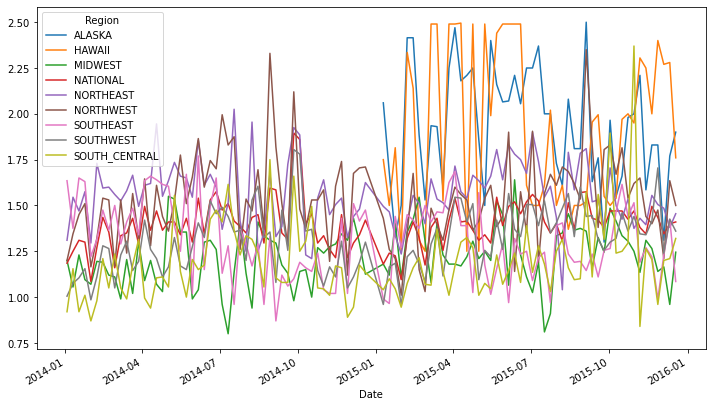

In [10]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [11]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

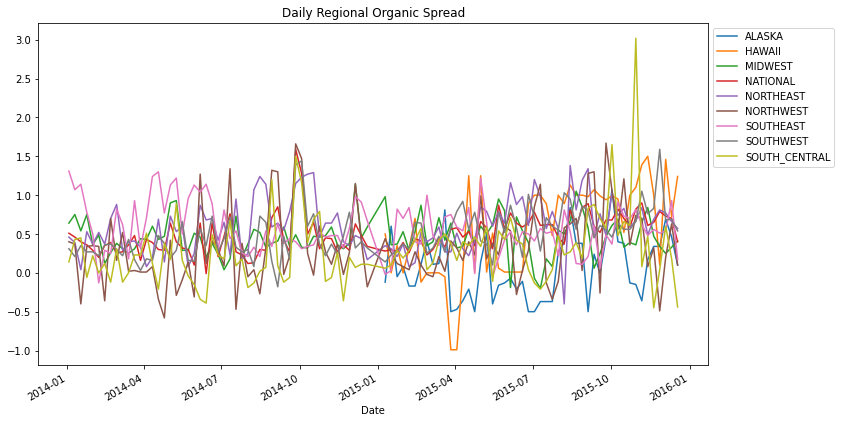

In [12]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [13]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


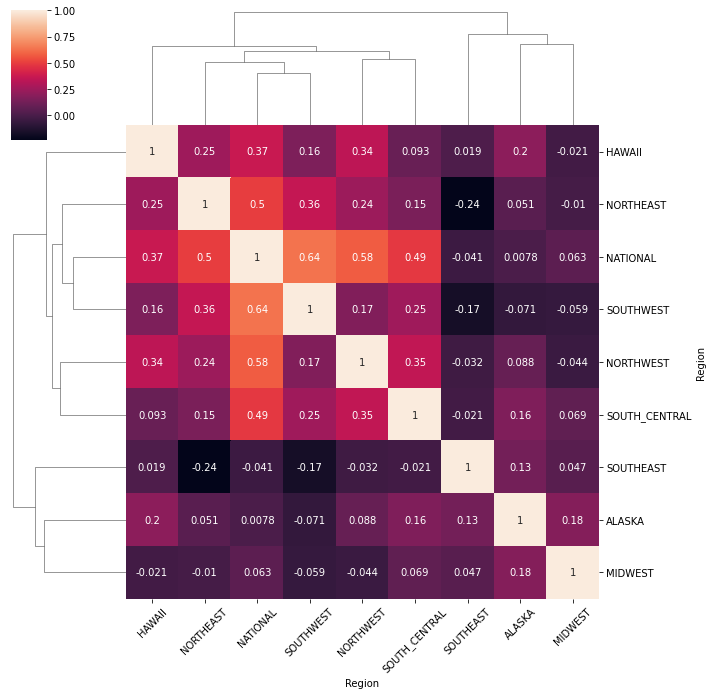

In [14]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Análisis similar a avocados pero con datos de SABER TyT**

Para ejecutar descargar el archivo en https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-TyT/iwgf-bkfk

*   Elemento de lista

*   Elemento de lista
*   Elemento de lista


*   Elemento de lista



In [2]:
import pandas as pd
Saber_TyT = pd.read_csv("Resultados__nicos_Saber_TyT.csv",decimal=',')
Saber_TyT

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19,21,44,46,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PERIODO,MOD_INGLES_DESEM,ESTU_DEPTO_RESIDE,ESTU_COD_COLE_MCPIO_TERMINO,INST_CARACTER_ACADEMICO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_RESIDE_MCPIO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_TIENELAVADORA,ESTU_NUCLEO_PREGRADO,...,FAMI_EDUCACIONMADRE,ESTU_PRGM_MUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_COD_MCPIO_PRESENTACION,ESTU_PAGOMATRICULAPROPIO,INST_NOMBRE_INSTITUCION,ESTU_PRGM_DEPARTAMENTO,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,ESTU_CONSECUTIVO
0,20173,A2,GUAVIARE,27361.0,ESCUELA NORMAL SUPERIOR,95.0,95001.0,Menos de 500 mil,No,NORMALES SUPERIORES,...,Primaria completa,NOCAIMA,NOCAIMA,95001.0,Si,I.E. DEPARTAMENTAL NORMAL SUPERIOR - SEDE PRIN...,CUNDINAMARCA,100,107,EK201730321021
1,20173,A2,SANTANDER,68276.0,INSTITUCIÓN TECNOLÓGICA,68.0,68001.0,No pagó matrícula,Si,INGENIERÍA CIVIL Y AFINES,...,Secundaria (Bachillerato) completa,BOGOTÁ D.C.,BOGOTÁ D.C.,68001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,109,104,EK201730263784
2,20173,A1,SANTANDER,68276.0,INSTITUCIÓN TECNOLÓGICA,68.0,68276.0,No pagó matrícula,Si,INGENIERÍA MECÁNICA Y AFINES,...,Secundaria (Bachillerato) incompleta,BOGOTÁ D.C.,BOGOTÁ D.C.,68001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,81,89,EK201730298881
3,20173,B2,SANTANDER,68547.0,INSTITUCIÓN TECNOLÓGICA,68.0,68547.0,No pagó matrícula,No,"INGENIERÍA AMBIENTAL, SANITARIA Y AFINES",...,Primaria completa,BOGOTÁ D.C.,BOGOTÁ D.C.,68001.0,Si,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,112,150,EK201730261985
4,20173,-A1,SANTANDER,68547.0,INSTITUCIÓN TECNOLÓGICA,68.0,68547.0,No pagó matrícula,No,"GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES",...,Primaria completa,BOGOTÁ D.C.,BOGOTÁ D.C.,68001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,61,80,EK201730257623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832419,20212,B1,ATLANTICO,20011.0,INSTITUCIÓN TECNOLÓGICA,8.0,8001.0,No pagó matrícula,Si,ADMINISTRACIÓN,...,Primaria incompleta,BARRANQUILLA,BOGOTÁ D.C.,8001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,ATLANTICO,132,132,EK202120021633
832420,20212,A1,BOGOTÁ,NaN,INSTITUCIÓN TECNOLÓGICA,11.0,11001.0,No pagó matrícula,Si,ECONOMÍA,...,Técnica o tecnológica completa,BOGOTÁ D.C.,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,66,99,EK202120015940
832421,20212,B1,CUNDINAMARCA,25473.0,INSTITUCIÓN TECNOLÓGICA,11.0,25473.0,No pagó matrícula,No,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",...,Secundaria (Bachillerato) incompleta,MOSQUERA,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,CUNDINAMARCA,100,132,EK202120025668
832422,20212,A1,CUNDINAMARCA,11001.0,INSTITUCIÓN TECNOLÓGICA,11.0,25307.0,No pagó matrícula,Si,ADMINISTRACIÓN,...,Secundaria (Bachillerato) completa,GIRARDOT,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,CUNDINAMARCA,99,82,EK202120011525


In [9]:
Saber_TyT.tail()

,PERIODO,MOD_INGLES_DESEM,ESTU_DEPTO_RESIDE,ESTU_COD_COLE_MCPIO_TERMINO,INST_CARACTER_ACADEMICO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_RESIDE_MCPIO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_TIENELAVADORA,ESTU_NUCLEO_PREGRADO,...,FAMI_EDUCACIONMADRE,ESTU_PRGM_MUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_COD_MCPIO_PRESENTACION,ESTU_PAGOMATRICULAPROPIO,INST_NOMBRE_INSTITUCION,ESTU_PRGM_DEPARTAMENTO,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,ESTU_CONSECUTIVO
832419,20212,B1,ATLANTICO,20011.0,INSTITUCIÓN TECNOLÓGICA,8.0,8001.0,No pagó matrícula,Si,ADMINISTRACIÓN,...,Primaria incompleta,BARRANQUILLA,BOGOTÁ D.C.,8001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,ATLANTICO,132,132,EK202120021633
832420,20212,A1,BOGOTÁ,NaN,INSTITUCIÓN TECNOLÓGICA,11.0,11001.0,No pagó matrícula,Si,ECONOMÍA,...,Técnica o tecnológica completa,BOGOTÁ D.C.,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,66,99,EK202120015940
832421,20212,B1,CUNDINAMARCA,25473.0,INSTITUCIÓN TECNOLÓGICA,11.0,25473.0,No pagó matrícula,No,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",...,Secundaria (Bachillerato) incompleta,MOSQUERA,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,CUNDINAMARCA,100,132,EK202120025668
832422,20212,A1,CUNDINAMARCA,11001.0,INSTITUCIÓN TECNOLÓGICA,11.0,25307.0,No pagó matrícula,Si,ADMINISTRACIÓN,...,Secundaria (Bachillerato) completa,GIRARDOT,BOGOTÁ D.C.,11001.0,No,SERVICIO NACIONAL DE APRENDIZAJE-SENA,CUNDINAMARCA,99,82,EK202120011525
832423,20212,B2,BOGOTÁ,25473.0,INSTITUCIÓN TECNOLÓGICA,11.0,11001.0,No pagó matrícula,Si,ECONOMÍA,...,Educación profesional incompleta,BOGOTÁ D.C.,BOGOTÁ D.C.,11001.0,Si,SERVICIO NACIONAL DE APRENDIZAJE-SENA,BOGOTÁ,136,140,EK202120027243


In [18]:
Saber_TyT.dtypes

PERIODO                             int64
MOD_INGLES_DESEM                   object
ESTU_DEPTO_RESIDE                  object
ESTU_COD_COLE_MCPIO_TERMINO       float64
INST_CARACTER_ACADEMICO            object
ESTU_COD_DEPTO_PRESENTACION       float64
ESTU_COD_RESIDE_MCPIO             float64
ESTU_VALORMATRICULAUNIVERSIDAD     object
FAMI_TIENELAVADORA                 object
ESTU_NUCLEO_PREGRADO               object
ESTU_PAIS_RESIDE                   object
ESTU_MCPIO_RESIDE                  object
ESTU_PAGOMATRICULABECA             object
ESTU_PAGOMATRICULACREDITO          object
ESTU_HORASSEMANATRABAJA            object
ESTU_SNIES_PRGMACADEMICO          float64
ESTU_PRGM_CODMUNICIPIO              int64
ESTU_PRIVADO_LIBERTAD              object
MOD_RAZONA_CUANTITAT_PUNT          object
MOD_COMUNI_ESCRITA_PUNT            object
ESTU_GENERO                        object
ESTU_COLE_TERMINO                  object
ESTU_PAGOMATRICULAPADRES           object
FAMI_ESTRATOVIVIENDA              

In [19]:
estu_prgm_depto = Saber_TyT[Saber_TyT.ESTU_PRGM_DEPARTAMENTO == 'BOGOTÁ']
estu_prgm_depto.groupby(['INST_CARACTER_ACADEMICO', 'MOD_INGLES_DESEM'])['MOD_LECTURA_CRITICA_PUNT']

In [20]:
regiones= ["SANTANDER", "GUAVIARE", "BOGOTÁ", "CUNDINAMARCA","CASANARE", "CAUCA","ARAUCA", "MAGDALENA"]
colombia = Saber_TyT[Saber_TyT["ESTU_DEPTO_RESIDE"].isin(regiones)]

colombia =colombia.drop("FAMI_TIENECOMPUTADOR", axis=1)

In [25]:
!pip install fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 194 kB 8.4 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


                          MOD_LECTURA_CRITICA_PUNT  MOD_INGLES_PUNT
MOD_LECTURA_CRITICA_PUNT                    1.0000           0.8427
MOD_INGLES_PUNT                             0.8427           1.0000


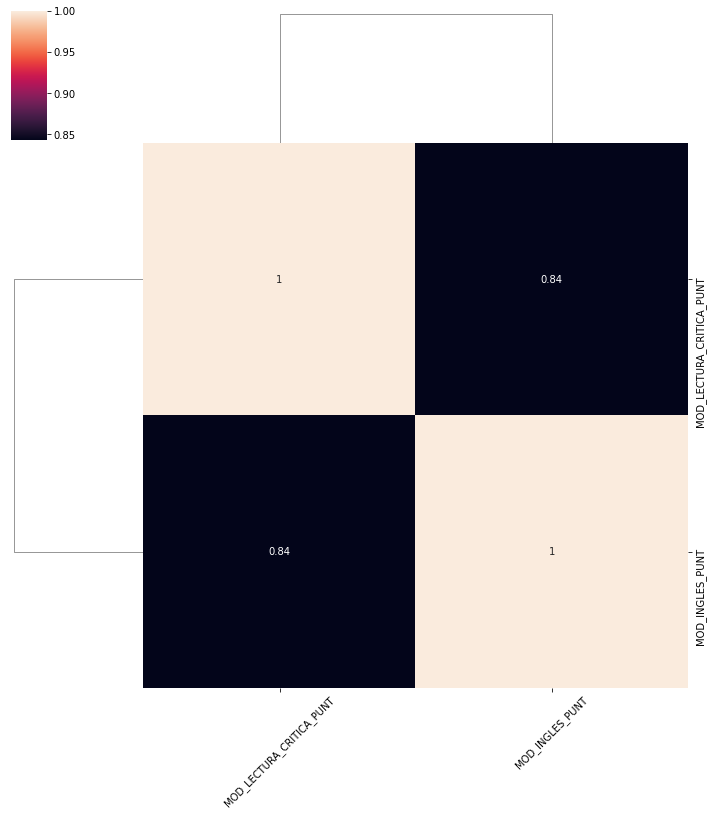

In [23]:
import seaborn as sns
regiones= ["SANTANDER", "GUAVIARE", "BOGOTÁ", "CUNDINAMARCA","CASANARE", "CAUCA","ARAUCA", "MAGDALENA"]
colombia = Saber_TyT[Saber_TyT["ESTU_DEPTO_RESIDE"].isin(regiones)]

newcolombia = colombia[["MOD_LECTURA_CRITICA_PUNT","MOD_INGLES_PUNT"]]
newcolombia['MOD_LECTURA_CRITICA_PUNT'] = pd.to_numeric(newcolombia['MOD_LECTURA_CRITICA_PUNT'])
newcolombia['MOD_INGLES_PUNT'] = pd.to_numeric(newcolombia['MOD_INGLES_PUNT'])


colomcorr= newcolombia.corr()
print(colomcorr)
grid = sns.clustermap(colomcorr, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);




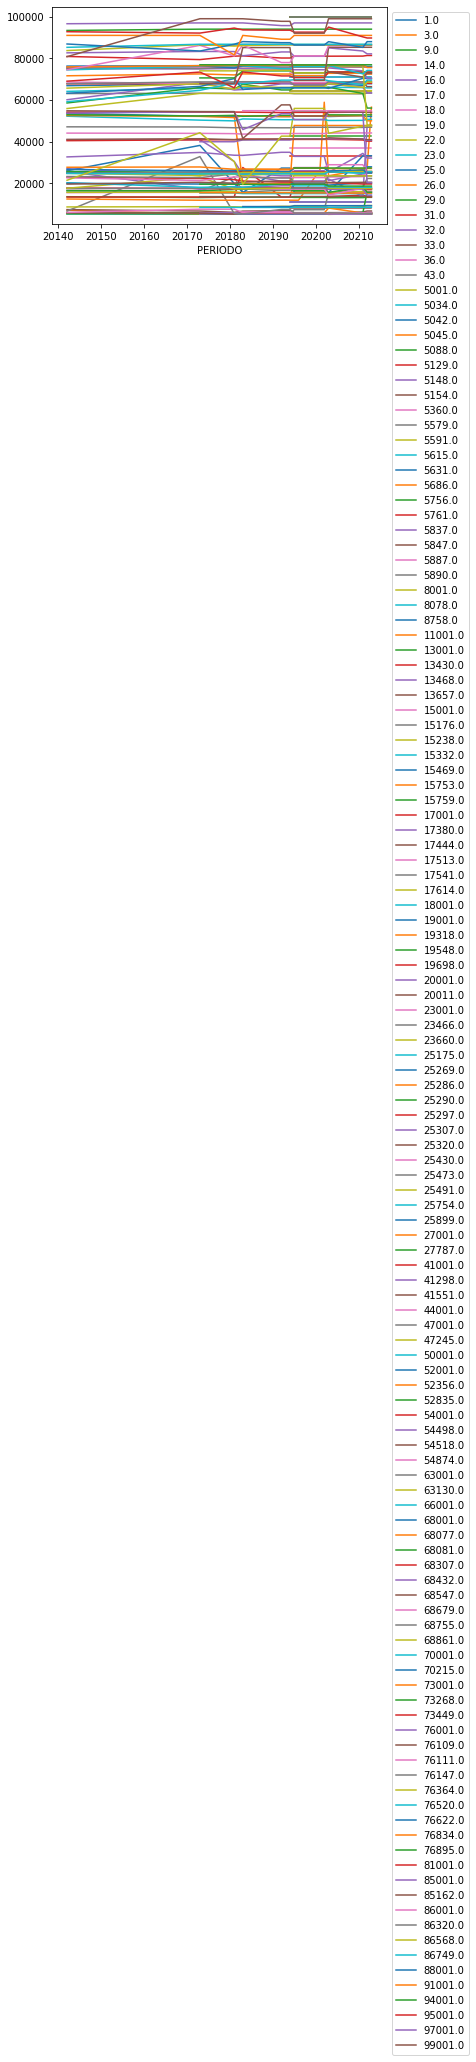

In [75]:
sena = Saber_TyT[Saber_TyT.INST_NOMBRE_INSTITUCION == 'SERVICIO NACIONAL DE APRENDIZAJE-SENA']
sena.groupby(['PERIODO', 'ESTU_COD_MCPIO_PRESENTACION'])['ESTU_COD_RESIDE_MCPIO'].mean().unstack().ffill().plot();
plt.legend(bbox_to_anchor=(1, 1));

def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_estu_pago = group.columns.get_level_values('ESTU_PAGOMATRICULAPROPIO').values.astype(bool)

    estu_pago = group.loc[:, is_estu_pago].squeeze()
    non_estu_pago = group.loc[:, ~is_estu_pago].squeeze()
    diff = estu_pago - non_estu_pago
    return diff

def organic_spread_by_region(df):
    return (
        df
        .set_index(['PERIODO', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_PAGOMATRICULAPROPIO'])
         ['ESTU_COD_RESIDE_MCPIO']
        .unstack(level=['ESTU_COD_MCPIO_PRESENTACION', 'ESTU_PAGOMATRICULAPROPIO'])
        .ffill()
        .groupby(level='ESTU_COD_MCPIO_PRESENTACION', axis=1)
        .apply(_organic_spread)
    )

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!